In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Helpers


In [7]:
TUT_NUM="06" # Lecture Number
FIG_COUNT=0  # To give each figure identical number when saving , for sorting issues
def saveFigure(desc):
    """save Figure 
    it is used after plotting it you want to save the figure
    figures will be saved in figures directory
    with file name format
    parameters:
    desc : string , describtion of the figure 
    """
    global FIG_COUNT
    global TUT_NUM
    FIG_COUNT+=1
    plt.savefig('figures/c%s-%d-%s'%(TUT_NUM,FIG_COUNT,desc))
def plotVector(X,desc,xlabel="x",ylabel="f(x)"):
    """
    - plot signal X
    - plot mean of the signal
    parameters:
    X: numpy array of shape (n,1)
    desc: describtion of the plot
    xlabel: label of x axis
    ylabel: label of y axis
    """
    N=X.shape[0]
    xmean=np.mean(X)
    plt.figure(desc)
    plt.plot(X)    
    plt.plot([0,N-1],[xmean,xmean])
    plt.title(desc)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def plotPulseTrain(X,desc):
    """
    parameters:
    X: numpy array of shape (n,1)
    desc: describtion of the plot
    """
    plt.figure(desc)
    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])
    plt.stem(X)
    plt.title(desc)
def scaleMax(X,maxValue):
    """
    parameters:
    X: numpy array of shape (n,1)
    maxValue: the new max value in the returned array
    
    return numpy array after scaling
    """
    mx=np.max(X)
    mul=maxValue/mx
    return X*mul

# Convolution

$y(n)=x(n)*h(n)$

- Get value of convolution at position n

$y(k)=\sum_{l=1}^{M} x(k-l)h(l)	$

- M=h.shape[0] # length of signal h
- k=point at which we will compute convolution

In [3]:
def getYk(X,h,k):
    """
    get kth value of the convolution
    parameters:
       X : numpy array of shape (N,1)
       h : numpy array of shape (M,1)
       k : scalar integer
    returns:
       kth value of the convolution between X and h
    """
    N=X.shape[0]
    M=h.shape[0]
    num=min(k,M)
    ser=[X[k-l]*h[l] for l in xrange(num) if k-l<N]
    return sum(ser)
def convolution(X,h):
    """
    get kth value of the convolution
    parameters:
       X : numpy array of shape (N,1)
       h : numpy array of shape (M,1)
    returns:
       the convolution between X and h
    """
    return np.array([getYk(X,h,k) for k in xrange(N+M)])

# Create pulse train
- Get pulse every 200 sample
- Plot pulse train

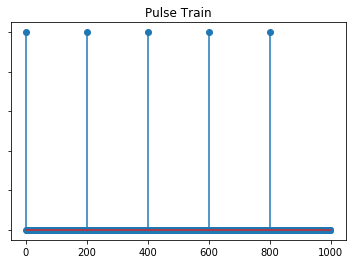

In [4]:
N=1000   # number of samples
T=5      # sec duration of the signal
dt=0.005 # sampling duration   T/N

xn=np.zeros(N).reshape(N,1)
xn[np.arange(0,1000,200)]=1    # pulse train every 200 sample

#plotting
desc="Pulse Train"
plotPulseTrain(xn,desc)
saveFigure(desc)
plt.show()

# Construct Signal

$f(t)=sin(2\pi f_0 t) e^{-\alpha t}$
- Get h(n) : sample each dt=0.005sec 
- Take first M=200 samples
- Scale max value to be maxValue=120 
- Plot this signal

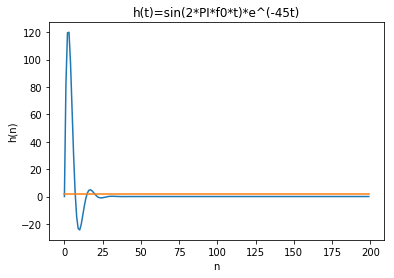

In [5]:
# create signal 
# h(t)=sin(2*PI*f0*t)*exp(-alpha*t)

M=200        # it is enough to take the first 200 values
maxValue=120 # scale y values , set max value to 120
alpha=45
f0=14        # signal frequency

t=np.arange(M).reshape((M,1))*dt    # t values at which we will take samples
hn=np.multiply(np.sin(2*np.pi*f0*t)
               ,np.exp(-alpha*t))   # sampling the signal h(t) 
hn=scaleMax(hn,maxValue)              # scaling y values , set max value to maxValue

# plotting signal
desc="h(t)=sin(2*PI*f0*t)*e^(-45t)"
plotVector(hn,desc,"n","h(n)")
saveFigure(desc)
plt.show()

## Convolution 
Construct convolution between signal h(n) and pulse train x(n)

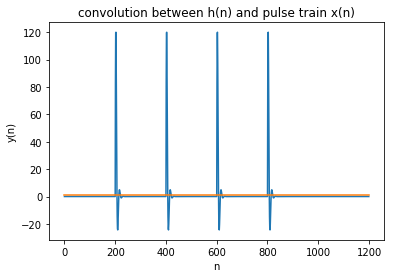

In [6]:
# construct convolution between signal h(n) and pulse train x(n)
yn=convolution(xn,hn)
desc="convolution between h(n) and pulse train x(n)"
plotVector(yn,desc,"n","y(n)")
saveFigure(desc)
plt.show()